In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D , Dense , Flatten , Dropout , MaxPool2D
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from tensorflow.keras.models import Sequential

In [4]:
path = "D:\Work\python\dl_clg\datasets\Brain_Tumor\Training"
path2 = "D:\Work\python\dl_clg\datasets\Brain_Tumor\Testing"

data_generator = ImageDataGenerator(rescale=1.0/255)

trainData = data_generator.flow_from_directory(
    path,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)
testData = data_generator.flow_from_directory(
    path2,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
)


Found 2870 images belonging to 4 classes.
Found 394 images belonging to 4 classes.


In [6]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    MaxPool2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPool2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(4, activation='softmax') 
])

In [12]:
model.compile(loss="categorical_crossentropy" , metrics=['accuracy'] , optimizer='adam')

In [13]:
history = model.fit(trainData , epochs=5 , validation_data=testData ,batch_size=32)

Epoch 1/5
90/90 [==============================] - 33s 316ms/step - loss: 1.0529 - accuracy: 0.5456 - val_loss: 2.0026 - val_accuracy: 0.3046
Epoch 2/5
90/90 [==============================] - 4s 48ms/step - loss: 0.6850 - accuracy: 0.7192 - val_loss: 2.1133 - val_accuracy: 0.4467
Epoch 3/5
90/90 [==============================] - 5s 50ms/step - loss: 0.4823 - accuracy: 0.8122 - val_loss: 1.9671 - val_accuracy: 0.5761
Epoch 4/5
90/90 [==============================] - 5s 51ms/step - loss: 0.4174 - accuracy: 0.8355 - val_loss: 2.1267 - val_accuracy: 0.5990
Epoch 5/5
90/90 [==============================] - 5s 56ms/step - loss: 0.2866 - accuracy: 0.8895 - val_loss: 2.6438 - val_accuracy: 0.6015


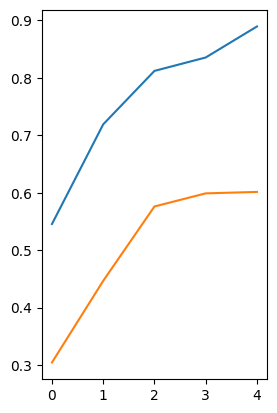

In [14]:
import matplotlib.pyplot as plt

plt.subplot(1,2,2)

plt.plot(history.history['accuracy'] , label='accuracy')
plt.plot(history.history['val_accuracy'] , label='val accuracy')